# 2회차: PyTorch 설치 및 기초 코딩

In [1]:
import torch

print(f'파이토치 버전: {torch.__version__}')
print("GPU" if torch.cuda.is_available() else "CPU")

파이토치 버전: 2.6.0+cu124
GPU


In [2]:
# torch 및 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
# 하이퍼파라미터 설정
batch_size = 64
learning_rate = 0.001
epochs = 5

In [4]:
# 데이터 전처리 및 로딩
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.6MB/s]


### MNIST 연습

In [9]:
print(f"학습 데이터 size: {len(train_dataset)}")
print(f"테스트 데이터 size: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")
print(f"Sample label: {train_dataset[0][1]}")

# 첫 번째 데이터 가져오기
first_image, first_label = train_dataset[0]

# 텐서 형태 및 값 확인
print(f"데이터 형태: {first_image.shape}")
print(f"데이터 타입: {first_image.dtype}")
print(f"레이블: {first_label}")

학습 데이터 size: 60000
테스트 데이터 size: 10000
Image shape: torch.Size([1, 28, 28])
Sample label: 5
데이터 형태: torch.Size([1, 28, 28])
데이터 타입: torch.float32
레이블: 5


In [10]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [16]:
test_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [21]:
import numpy as np

# 이미지 데이터 출력 (배열 형태 그대로)
np_image = first_image.numpy()
# np.set_printoptions(precision=2)  # 소수점 이하 3자리
# np_image = np_image.reshape(28, 28)
for i in range(np_image.shape[1]):
  for j in range(np_image.shape[2]):
    s = f"{' '*4}" if np_image[0][i][j] == 0 else f"{np_image[0][i][j]:.1f}"
    print(s, end=" ")
  print()

                                                                                                                                            
                                                                                                                                            
                                                                                                                                            
                                                                                                                                            
                                                                                                                                            
                                                            0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5                     
                                        0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3                     
                                   0.2 0.

In [22]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [24]:
%config InlineBackend.figure_format = 'retina'

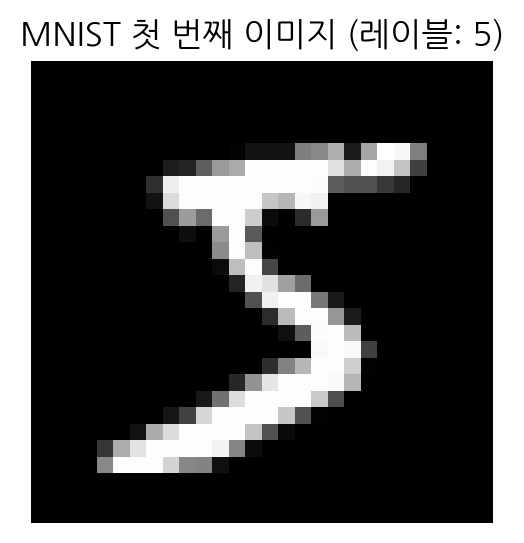

In [25]:
import matplotlib.pyplot as plt

# 이미지 시각화
plt.figure(figsize=(3, 3))
# 원본 이미지 시각화
# plt.subplot(1, 2, 1)
plt.imshow(np_image[0], cmap='gray')
plt.axis('off')  # 축, 눈금, 테두리까지 제거
plt.title(f'MNIST 첫 번째 이미지 (레이블: {first_label})');

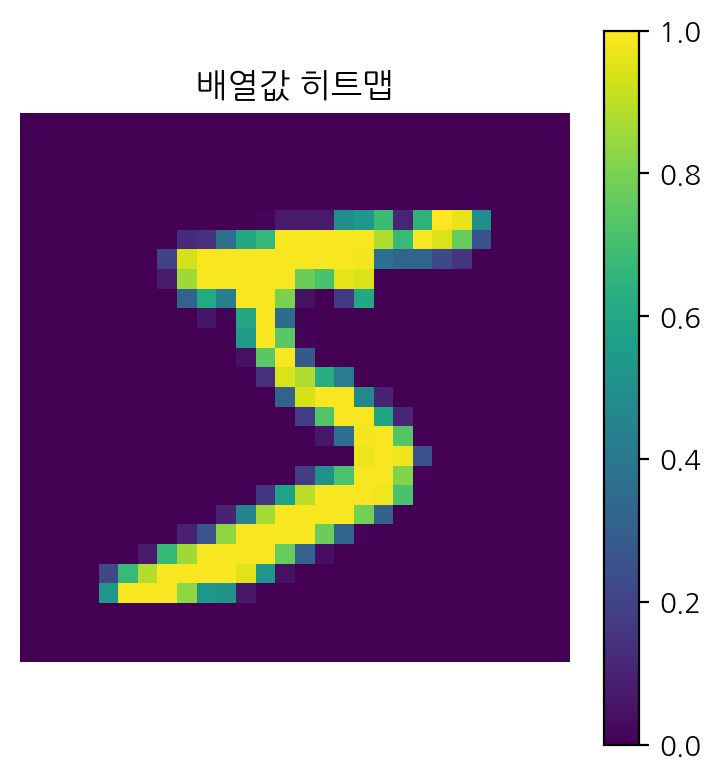

In [27]:
# 배열값 히트맵으로 시각화
plt.figure(figsize=(4, 4))
plt.imshow(np_image[0], cmap='viridis')
plt.title('배열값 히트맵')
plt.colorbar()

plt.tight_layout()
plt.axis('off')  # 축, 눈금, 테두리까지 제거
plt.show()

### 다시 ANN 코딩

In [36]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [30]:
# 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
# 모델 생성 및 컴파일 적용
model = DNN().to(device)
# compiled_model = torch.compile(model)
compiled_model = torch.compile(model, mode="default")

# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(compiled_model.parameters(), lr=learning_rate)

In [42]:
# 모델 학습을 위한 전체 학습 루프 함수
# 설정된 에폭 수만큼 학습을 반복
for epoch in range(epochs):
    # 모델을 학습 모드로 설정(배치 정규화, 드롭아웃 등이 활성화됨)
    compiled_model.train()
    # 에폭당 총 손실값을 저장할 변수 초기화
    total_loss = 0
    # 정확하게 분류한 샘플 수를 저장할 변수 초기화
    correct = 0
    # 학습 데이터셋을 배치 단위로 반복
    for data, target in train_loader:
        # 데이터와 타겟을 지정된 디바이스(CPU 또는 GPU)로 이동
        data, target = data.to(device), target.to(device)

        # 순전파 → 손실 → 역전파 → 옵티마이저 스텝
        # 옵티마이저의 그래디언트 값을 0으로 초기화(이전 배치의 그래디언트 영향 제거)
        optimizer.zero_grad()
        # 모델에 입력 데이터를 전달하여 예측값 계산(순전파)
        output = compiled_model(data)
        # 손실 함수를 사용하여 예측값과 실제값 간의 오차 계산
        loss = criterion(output, target)
        # 손실에 대한 그래디언트 계산(역전파)
        loss.backward()
        # 계산된 그래디언트를 사용하여 모델 파라미터 업데이트
        optimizer.step()

        # 현재 배치의 손실값을 총 손실에 추가
        total_loss += loss.item()
        # 정확히 예측한 샘플 수를 누적(가장 높은 확률의 클래스가 실제 타겟과 일치하는지 확인)
        correct += (output.argmax(1) == target).sum().item()
    # 전체 학습 데이터셋에 대한 정확도 계산(백분율)
    accuracy = 100. * correct / len(train_loader.dataset)
    # 현재 에폭의 학습 결과(에폭 번호, 손실값, 정확도) 출력
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1, Loss: 40.5673, Accuracy: 98.61%
Epoch 2, Loss: 32.8300, Accuracy: 98.88%
Epoch 3, Loss: 27.5598, Accuracy: 99.09%
Epoch 4, Loss: 21.8888, Accuracy: 99.27%
Epoch 5, Loss: 19.1980, Accuracy: 99.31%


In [34]:
# 학습 루프
for epoch in range(epochs): # 전체 에폭 반복
    compiled_model.train() # 학습 모드 설정
    total_loss = 0
    correct = 0
    for data, target in train_loader: # 배치 반복
        data, target = data.to(device), target.to(device) # 입력/라벨 GPU로 이동

        # 순전파 → 손실 → 역전파 → 옵티마이저 스텝
        optimizer.zero_grad()
        output = compiled_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (output.argmax(1) == target).sum().item()

    # 정확도 계산
    accuracy = 100. * correct / len(train_loader.dataset)
    # 에폭별 결과 출력
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1, Loss: 319.1066, Accuracy: 90.48%
Epoch 2, Loss: 128.1721, Accuracy: 95.91%
Epoch 3, Loss: 87.3304, Accuracy: 97.17%
Epoch 4, Loss: 66.2484, Accuracy: 97.79%
Epoch 5, Loss: 49.1323, Accuracy: 98.37%


In [35]:
# 테스트 루프
compiled_model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = compiled_model(data)
        correct += (output.argmax(1) == target).sum().item()

test_accuracy = 100. * correct / len(test_loader.dataset)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.60%


### Loader 학습

In [41]:
# DataLoader 기본 정보 출력
print("===== DataLoader 기본 정보 =====")
print(f"학습 데이터셋 크기: {len(train_dataset)} 샘플")
print(f"테스트 데이터셋 크기: {len(test_dataset)} 샘플")
print(f"배치 크기: {batch_size}")
print(f"학습 배치 수: {len(train_loader)} == {len(train_dataset)//batch_size + 1}")
print(f"테스트 배치 수: {len(test_loader)} == {len(test_dataset)//batch_size + 1}")

# 단일 배치 살펴보기
print("\n===== 단일 배치 구조 확인 =====")
for batch_idx, (data, target) in enumerate(train_loader):
    print(f"배치 {batch_idx+1}:")
    print(f"데이터 형태: {data.shape}")  # [batch_size, channels, height, width]
    print(f"타겟 형태: {target.shape}")  # [batch_size]
    print(f"데이터 타입: {data.dtype}")
    print(f"타겟 타입: {target.dtype}")
    print(f"타겟 클래스 분포: {torch.bincount(target)}")
    # 첫 번째 배치만 확인
    break
    # 여기까지
    ################################################################################
    # 배치의 첫 번째 이미지 시각화
    plt.figure(figsize=(8, 4))

    # 원본 이미지
    plt.subplot(1, 2, 1)
    img = data[0].squeeze().numpy()
    plt.imshow(img, cmap='gray')
    plt.title(f'레이블: {target[0].item()}')
    plt.axis('off')

    # 배치 내 이미지 몇 개 시각화
    plt.subplot(1, 2, 2)
    grid_size = min(4, batch_size)
    fig, axes = plt.subplots(2, grid_size//2, figsize=(10, 5))
    axes = axes.flatten()

    for i in range(grid_size):
        img = data[i].squeeze().numpy()
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'레이블: {target[i].item()}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # 첫 번째 배치만 확인
    break

===== DataLoader 기본 정보 =====
학습 데이터셋 크기: 60000 샘플
테스트 데이터셋 크기: 10000 샘플
배치 크기: 64
학습 배치 수: 938 == 938
테스트 배치 수: 157 == 157

===== 단일 배치 구조 확인 =====
배치 1:
데이터 형태: torch.Size([64, 1, 28, 28])
타겟 형태: torch.Size([64])
데이터 타입: torch.float32
타겟 타입: torch.int64
타겟 클래스 분포: tensor([9, 8, 7, 2, 6, 8, 5, 8, 5, 6])


## 전체 코드

In [ ]:
# torch 및 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 하이퍼파라미터 설정
batch_size = 64
learning_rate = 0.001
epochs = 5

# 데이터 전처리 및 로딩
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 생성 및 컴파일 적용
model = DNN().to(device)
compiled_model = torch.compile(model)

# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(compiled_model.parameters(), lr=learning_rate)

# 학습 루프
for epoch in range(epochs): # 전체 에폭 반복
    compiled_model.train() # 학습 모드 설정
    total_loss = 0
    correct = 0
    for data, target in train_loader: # 배치 반복
        data, target = data.to(device), target.to(device) # 입력/라벨 GPU로 이동

        # 순전파 → 손실 → 역전파 → 옵티마이저 스텝
        optimizer.zero_grad()
        output = compiled_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (output.argmax(1) == target).sum().item()

    # 정확도 계산
    accuracy = 100. * correct / len(train_loader.dataset)
    # 에폭별 결과 출력
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

# 테스트 루프
compiled_model.eval() # 평가 모드 설정
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = compiled_model(data)
        correct += (output.argmax(1) == target).sum().item()

test_accuracy = 100. * correct / len(test_loader.dataset)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Epoch 1, Loss: 311.5699, Accuracy: 90.70%
Epoch 2, Loss: 126.7101, Accuracy: 95.94%
Epoch 3, Loss: 86.7187, Accuracy: 97.17%
Epoch 4, Loss: 64.7582, Accuracy: 97.80%
Epoch 5, Loss: 51.4485, Accuracy: 98.27%
Test Accuracy: 97.63%


## End of code